## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [48]:
%matplotlib inline

import math

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [49]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [50]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [51]:
#answer below:
absent.drop(columns=['ID','Hit target','Reason for absence','Weight','Height','Month of absence'], inplace=True)


In [52]:
categorical = absent.select_dtypes(include=['int64'])
for i in categorical:
    column = categorical[i]
    print(i)
    print({column.nunique()})

Day of the week
{5}
Seasons
{4}
Transportation expense
{24}
Distance from Residence to Work
{25}
Service time
{18}
Age
{22}
Disciplinary failure
{2}
Education
{4}
Son
{5}
Social drinker
{2}
Social smoker
{2}
Pet
{6}
Body mass index
{17}
Absenteeism time in hours
{19}


In [53]:
num_features = ['Transportation expense','Distance from Residence to Work','Service time','Age','Body mass index']
cat_features = ['Day of the week', 'Seasons','Disciplinary failure','Education','Son','Social drinker','Social smoker','Pet']

In [54]:
hotcode = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()
preprocessor = ColumnTransformer(transformers=[('num',scaler,num_features),
                                               ('cat',hotcode,cat_features)])

In [55]:
X = absent.drop(columns='Absenteeism time in hours')
y = absent['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 592
The number of observations in test set is 148


In [56]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

Scale the independent variables using the standard scaler

In [57]:
# answer below:
# independent variables scaled above to utilize the ColumnTransformer function. 


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [58]:
# answer below:

start_time = datetime.now()

svr_linear = SVR(kernel='linear', C=.1)
svr_linear.fit(X_train_proc, y_train)
print('Train Score: {:.4f} -- Test Score: {:.4f}'.format(svr_linear.score(X_train_proc, y_train),svr_linear.score(X_test_proc, y_test)))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Train Score: -0.0233 -- Test Score: -0.0176
Duration: 0:00:00.039988


In [59]:
start_time1 = datetime.now()

svr_poly = SVR(kernel='poly', C=10000, epsilon=1, gamma='scale')
svr_poly.fit(X_train_proc, y_train)
print('Train Score: {:.4f} -- Test Score: {:.4f}'.format(svr_poly.score(X_train_proc, y_train),svr_poly.score(X_test_proc, y_test)))

end_time1 = datetime.now()
print('Duration: {}'.format(end_time1 - start_time1))

Train Score: 0.3886 -- Test Score: -1.5484
Duration: 0:00:00.785318


In [60]:
start_time2 = datetime.now()

svr_rbf = SVR(kernel='rbf', C=10000, epsilon=.1, gamma='scale')
svr_rbf.fit(X_train_proc, y_train)
print('Train Score: {:.4f} -- Test Score: {:.4f}'.format(svr_rbf.score(X_train_proc, y_train),svr_rbf.score(X_test_proc, y_test)))

end_time2 = datetime.now()
print('Duration: {}'.format(end_time2 - start_time2))

Train Score: 0.4180 -- Test Score: -0.6428
Duration: 0:00:00.212553


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [61]:
# answer below:
svr = SVR(gamma='scale')
parameters = {'kernel':('linear','poly','rbf'), 'C':[.1 , 1, 10, 100, 1000, 10000]}
grid = GridSearchCV(estimator=SVR(), param_grid=parameters, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_proc, y_train)
#grid.score(X_train_proc, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'kernel': ('linear', 'poly', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

In [67]:

train_pred = grid.predict(X_train_proc)
test_pred = grid.predict(X_test_proc)

print(
    f'best kernal: {grid.best_estimator_.kernel}\n'
    f'best C: {grid.best_estimator_.C}\n'
    f'train RMSE: {mean_squared_error(train_pred, y_train, squared=False)}\n'
    f'test RMSE: {mean_squared_error(test_pred, y_test, squared=False)}\n'
)

best kernal: linear
best C: 10
train RMSE: 13.529846876119448
test RMSE: 12.538773995940689



In [63]:
svr1 = SVR(C=1, epsilon=.1, gamma='scale', kernel='rbf')
svr1.fit(X_train_proc, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [64]:
svr1.score(X_train_proc, y_train)

0.0012321231569041302

Mean of the errors in the absenteeism model is: 2.902421435114505


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


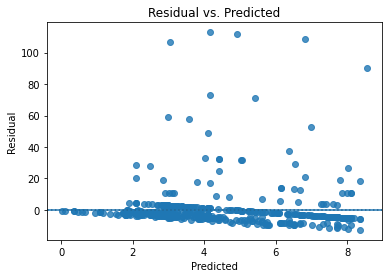

In [65]:
# answer below:

predictions = svr1.predict(X_train_proc)
errors = y_train - predictions

print("Mean of the errors in the absenteeism model is: {}".format(np.mean(errors)))

sns.residplot(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Mean of the errors in the absenteeism model is: 2.230392648378669


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


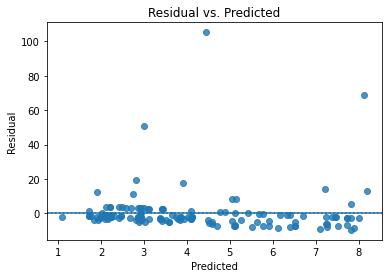

In [66]:
# answer below:

predictions1 = svr1.predict(X_test_proc)
errors1 = y_test - predictions1

print("Mean of the errors in the absenteeism model is: {}".format(np.mean(errors1)))

sns.residplot(predictions1, errors1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()